In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

In [33]:
# Read starbucks
starbucks = pd.read_csv('MexicoCityStarbucks.csv')
starbucks

,Brand,Street Address,City,State/Province,Country,Postcode,Longitude,Latitude
0,Starbucks,"Jose Ma Castorena 320, Col. Villas Cuajimalpa",Mexico City,DIF,MX,5000,-99.29,19.36
1,Starbucks,"Av. Camino al Olivo No. 22, Col. Lomas de Vist...",Mexico City,DIF,MX,5100,-99.28,19.37
2,Starbucks,Av. Tamaulipas No. 3000,Mexico City,DIF,MX,5340,-99.28,19.36
3,Starbucks,"Av. Vasco de Quiroga 3800, Local 255, Col. Ant...",Mexico City,DIF,MX,5109,-99.28,19.36
4,Starbucks,"Av. Vasco de Quiroga 3800, Local 155",Mexico City,DIF,MX,5109,-99.28,19.36
...,...,...,...,...,...,...,...,...
203,Starbucks,1512 Avenue Canal de Tezontle,Mexico City,DIF,MX,9020,-99.08,19.38
204,Starbucks,1512 Avenue Canal de Tezontle,Mexico City,DIF,MX,9020,-99.08,19.38
205,Starbucks,Aeropuerto Intenacional de la Cd. Mex,Mexico City,DIF,MX,15620,-99.05,19.45
206,Starbucks,"Lago Alberto esquina Mariano Escobedo, Mariano...",Mexico,DIF,MX,11520,-99.02,19.30


<AxesSubplot:>

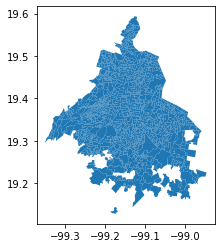

In [9]:
#import shape
# https://data.opendatasoft.com/explore/dataset/georef-mexico-colonia%40public/export/?disjunctive.sta_code&disjunctive.sta_name&disjunctive.mun_code&disjunctive.mun_name&disjunctive.col_code&disjunctive.col_name&location=10,19.36077,-99.14801&basemap=jawg.streets
cdmx= gpd.read_file('cdmx/georef-mexico-colonia-millesime.shp')
cdmx.plot()

In [34]:
# Geopandas Dataframe

crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(starbucks['Longitude'], starbucks['Latitude'])]
starbucks = gpd.GeoDataFrame(starbucks, 
                          crs = crs, 
                          geometry = geometry)

D:\Users\raul.esqueda\Anaconda3\envs\PythonData\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [13]:
starbucks.head()

,Brand,Street Address,City,State/Province,Country,Postcode,Longitude,Latitude,geometry
0,Starbucks,"de la Industria Militar 1296,, Lomas de Chamiz...",Ciudad de Mexico,DIF,MX,5129,-99.26,19.39,POINT (-99.26000 19.39000)
1,Starbucks,"Homero n.503, Col. Chapultepec Morales, Del. M...",DF,DIF,MX,11570,-99.19,19.44,POINT (-99.19000 19.44000)
2,Starbucks,"Palanque s/n, Col. Narvarte",DF,DIF,MX,1030,-99.15,19.40,POINT (-99.15000 19.40000)
3,Starbucks,AV SAN JERONIMO 819 COL SAN JERONIMO,DISTRITO FEDERAL,DIF,MX,10200,-99.23,19.32,POINT (-99.23000 19.32000)
4,Starbucks,RENATO LEDUC 224 COL TORIELLO GUERRA,DISTRITO FEDERAL,DIF,MX,14050,-99.16,19.30,POINT (-99.16000 19.30000)


Text(0.5, 1.0, 'Mapping Starbucks in Mexico City')

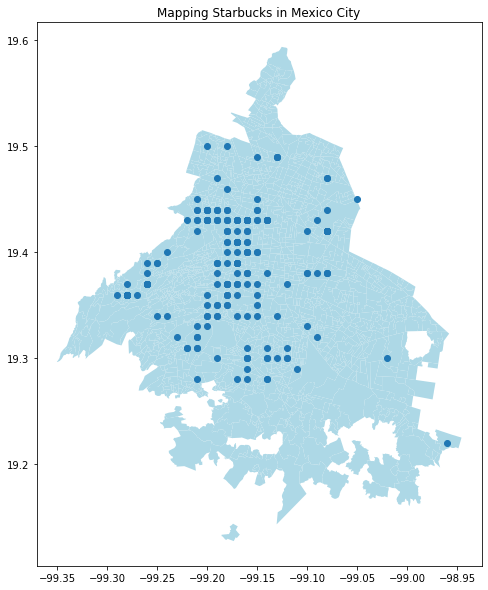

In [35]:
# Visualization

fig, ax = plt.subplots(figsize = (10,10))
cdmx.to_crs(epsg=4326).plot(ax=ax, color='lightblue')
starbucks.plot(ax=ax)
ax.set_title('Mapping Starbucks in Mexico City')

In [36]:
# Read Airbnb
airbnb = pd.read_csv('Airbnb.csv')
airbnb

,last_scraped,name,neighbourhood_cleansed,latitude,longitude,price
0,9/22/2022,Villa Dante,Cuajimalpa de Morelos,19.382830,-99.271780,"$4,001.00"
1,9/22/2022,"Area Sta.Fe,IberoABC Hospital Rooms",Cuajimalpa de Morelos,19.353790,-99.284590,$500.00
2,9/23/2022,Classic but Modern Apartment in Condesa,Cuauhtémoc,19.418240,-99.175600,$599.00
3,9/23/2022,CONDESA HAUS B&B,Cuauhtémoc,19.411620,-99.177940,"$18,000.00"
4,9/22/2022,Live Mexico City Like a Small Town,Benito Juárez,19.384680,-99.177080,$740.00
...,...,...,...,...,...,...
22943,9/22/2022,Depa seguro a 10 mns en auto del AICM,Gustavo A. Madero,19.465703,-99.051118,$450.00
22944,9/22/2022,Comoda habitación con vista e iluminación natural,Miguel Hidalgo,19.421690,-99.245990,$750.00
22945,9/22/2022,Beautiful house gardens & terraces,Miguel Hidalgo,19.430260,-99.238160,"$5,041.00"
22946,9/22/2022,Amplio Dpto a 5 min de Av P. de las Palmas/Par...,Miguel Hidalgo,19.427120,-99.224520,"$1,100.00"


In [37]:
# Geopandas Dataframe

crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(airbnb['longitude'], airbnb['latitude'])]
airbnb = gpd.GeoDataFrame(airbnb, 
                          crs = crs, 
                          geometry = geometry)

D:\Users\raul.esqueda\Anaconda3\envs\PythonData\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [38]:
airbnb.head()

,last_scraped,name,neighbourhood_cleansed,latitude,longitude,price,geometry
0,9/22/2022,Villa Dante,Cuajimalpa de Morelos,19.38283,-99.27178,"$4,001.00",POINT (-99.27178 19.38283)
1,9/22/2022,"Area Sta.Fe,IberoABC Hospital Rooms",Cuajimalpa de Morelos,19.35379,-99.28459,$500.00,POINT (-99.28459 19.35379)
2,9/23/2022,Classic but Modern Apartment in Condesa,Cuauhtémoc,19.41824,-99.17560,$599.00,POINT (-99.17560 19.41824)
3,9/23/2022,CONDESA HAUS B&B,Cuauhtémoc,19.41162,-99.17794,"$18,000.00",POINT (-99.17794 19.41162)
4,9/22/2022,Live Mexico City Like a Small Town,Benito Juárez,19.38468,-99.17708,$740.00,POINT (-99.17708 19.38468)


Text(0.5, 1.0, 'Mapping Airbnb in Mexico City')

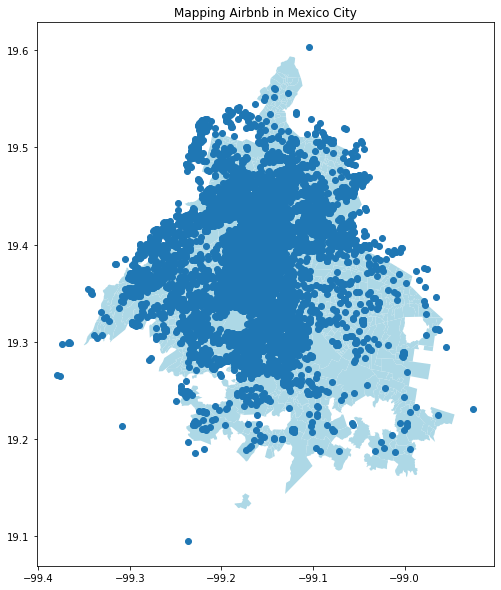

In [42]:
# Visualization

fig, ax = plt.subplots(figsize = (10,10))
cdmx.to_crs(epsg=4326).plot(ax=ax, color='lightblue')
airbnb.plot(ax=ax)
ax.set_title('Mapping Airbnb in Mexico City')

Text(0.5, 1.0, 'Airbnb in Mexico City by Municipality')

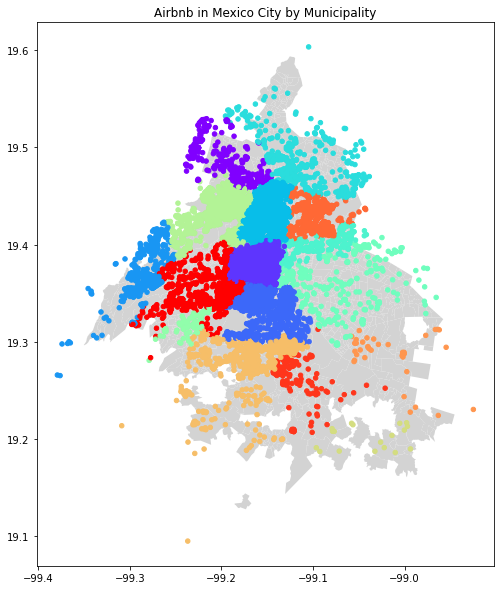

In [47]:
# Heatmap

fig, ax = plt.subplots(figsize = (10,10))
cdmx.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
airbnb.plot(column = 'neighbourhood_cleansed', ax=ax, cmap = 'rainbow', 
            markersize = 20)
ax.set_title('Airbnb in Mexico City by Municipality')